In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [ ]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape : {0}, x_test.shape : {1}'.format(x_train.shape, x_test.shape))
print('t_train.shape : {0}, t_test.shape : {1}'.format(t_train.shape, t_test.shape))


11501568/11490434 [==============================] - 0s 0us/step
x_train.shape : (60000, 28, 28), x_test.shape : (10000, 28, 28)
t_train.shape : (60000,), t_test.shape : (10000,)


In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1),
                kernel_size=3, filters=32,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))

model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_train.reshape(-1,28,28,1), t_train,
                 batch_size=50, epochs=10, validation_split=0.2)

Epoch 1/10
960/960 [==============================] - 5s 5ms/step - loss: 0.0819 - accuracy: 0.9768 - val_loss: 0.0790 - val_accuracy: 0.9781
Epoch 2/10
960/960 [==============================] - 5s 5ms/step - loss: 0.0649 - accuracy: 0.9807 - val_loss: 0.0738 - val_accuracy: 0.9782
Epoch 3/10
960/960 [==============================] - 5s 5ms/step - loss: 0.0537 - accuracy: 0.9843 - val_loss: 0.0717 - val_accuracy: 0.9792
Epoch 4/10
960/960 [==============================] - 5s 5ms/step - loss: 0.0460 - accuracy: 0.9862 - val_loss: 0.0675 - val_accuracy: 0.9807
Epoch 5/10
960/960 [==============================] - 5s 5ms/step - loss: 0.0403 - accuracy: 0.9881 - val_loss: 0.0653 - val_accuracy: 0.9808
Epoch 6/10
960/960 [==============================] - 5s 5ms/step - loss: 0.0354 - accuracy: 0.9897 - val_loss: 0.0676 - val_accuracy: 0.9804
Epoch 7/10
960/960 [==============================] - 5s 5ms/step - loss: 0.0301 - accuracy: 0.9914 - val_loss: 0.0702 - val_accuracy: 0.9803
Epoch 

In [ ]:
model.evaluate(x_test.reshape(-1,28,28,1), t_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0595 - accuracy: 0.9824


[0.05947856977581978, 0.9824000000953674]

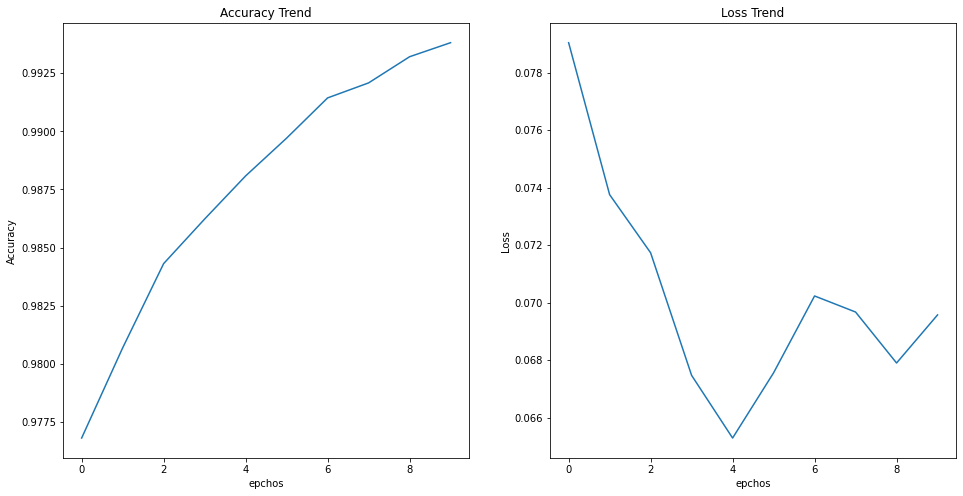

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(hist.history['accuracy'])
plt.xlabel('epchos')
plt.ylabel('Accuracy')
plt.title('Accuracy Trend')
plt.subplot(122)
plt.plot(hist.history['val_loss'])
plt.xlabel('epchos')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.show()